<h1>Utilizing Machine Learning to Forecast Passenger Satisfaction in Airline industry</h1>

<h3>Importing necessary libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

<h3>Importing Dataset</h3>

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/BI_Project_dataset/Airline_customer_satisfaction.csv")
df.head(1)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0


<h3>Data Understanding and Initial Exploration</h3>
<h4>🧾Data Understanding</h4>

In [3]:
print("\n🧾 Dataset Preview:")
print(df.head())
df.info()



🧾 Dataset Preview:
  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                      

In [4]:
#Understanding datatypes helps us later for data preperation, 
#if we need to change categorical data into numerical data for training our model
print("\n🔍 Data Types:\n", df.dtypes)



🔍 Data Types:
 satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             fl

<h4>Observations</h4>
Satisfaction, Costumer Type, Type of travel and class features have the data type object
<br/>These feature datatypes need to be converted into suitable datatypes for EDA

<h3>Exploratory Data Analysis</h3>
<h4>Observing customer rating and mean values</h4>

In [5]:
#........................................customer Satisfaction.......................................... 
# Unique values in the target variable
print("Satisfaction Labels:", df["satisfaction"].unique())
# Value counts
print("Satisfaction Distribution:\n", df["satisfaction"].value_counts())
# Percentage breakdown
df["satisfaction"].value_counts(normalize=True) * 100



Satisfaction Labels: ['satisfied' 'dissatisfied']
Satisfaction Distribution:
 satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64

<h3>Observation</h3>
<p>The dataset contains two satisfaction levels: Satisfied and Dissatisfied.
About 54% of passengers are satisfied, while 46% are not—indicating a slight class imbalance.</p>

<h3>Feature Understanding</h3>

In [6]:
#.................................................Customer Type...............................
print("Customer Types:", df["Customer Type"].unique())
print("\nCustomer Type Distribution:\n", df["Customer Type"].value_counts())
df["Customer Type"].value_counts(normalize=True) * 100
#.................................................Age...............................
print("Average Age:", df["Age"].mean())
#................................................Type of Travel.......................
print("\nTravel Purpose Distribution:\n", df["Type of Travel"].value_counts())
#................................................class of Travel.......................
print("\nTravel Class Distribution:\n", df["Class"].value_counts())
#................................................seat comfort.......................
print("Seat Comfort Mean Rating:", df["Seat comfort"].mean())
print("\nSeat Comfort Value Counts:\n", df["Seat comfort"].value_counts())
#................................................Food and Drink.......................
print("Food and Drink Mean Rating:", df["Food and drink"].mean())
print("\nFood and Drink Value Counts:\n", df["Food and drink"].value_counts())
#................................................Time Convenience.......................
print("Departure/Arrival Time Convenient Mean:", df["Departure/Arrival time convenient"].mean())
print("\nValue Counts:\n", df["Departure/Arrival time convenient"].value_counts())


Customer Types: ['Loyal Customer' 'disloyal Customer']

Customer Type Distribution:
 Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
Average Age: 39.42795657530028

Travel Purpose Distribution:
 Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Travel Class Distribution:
 Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
Seat Comfort Mean Rating: 2.838597166615337

Seat Comfort Value Counts:
 Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
Food and Drink Mean Rating: 2.851994148444718

Food and Drink Value Counts:
 Food and drink
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: count, dtype: int64
Departure/Arrival Time Convenient Mean: 2.990645210963967

Value Counts:
 Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dt

<h3>Observation</h3>
<p><b>Customer Type:</b>A large majority (81.7%) of the customers are Loyal, with only 18.3% being disloyal. This shows the airline has a strong base of returning customers.
</p>
<p><b>Average Age:</b>The average passenger age is approximately 39.4 years, suggesting a mature and diverse customer demographic.
</p>
<p><b>Type of Travel:</b>Business travel accounts for 69% of total trips, indicating that the airline serves a predominantly business-oriented clientele.
</p>
<p><b>Travel Class:</b>Most passengers travel in Business class (48%), followed by Economy (45%), and a smaller segment in Eco Plus (7%).
</p>
<p><b>Seat Comfort:</b>Average rating is 2.84, with most passengers giving it a 3, 2, or 4—indicating a slightly above average experience.
</p>
<p><b>Food and Drink:</b>Average rating is 2.85; the distribution is also centered around 3, 4, and 2, reflecting mixed satisfaction.
</p>
<p><b>Departure/Arrival Time Convenience:</b>Rated ~3.0 on average. The highest counts were for 4, 5, and 3, indicating that flight schedules are generally perceived as convenient.
</p>


<h3>Feature Understanding</h3>

In [7]:
#.................................overview of service rating..................
print("Gate Location Mean:", df["Gate location"].mean())
print("On-board Service Mean:", df["On-board service"].mean())
print("\nOn-board Service Ratings:\n", df["On-board service"].value_counts())

print("Leg Room Service Mean:", df["Leg room service"].mean())
print("Baggage Handling Mean:", df["Baggage handling"].mean())
print("Check-in Service Mean:", df["Checkin service"].mean())
print("Cleanliness Mean:", df["Cleanliness"].mean())

Gate Location Mean: 2.990421927933477
On-board Service Mean: 3.465075454265476

On-board Service Ratings:
 On-board service
4    40675
5    31724
3    27037
2    17174
1    13265
0        5
Name: count, dtype: int64
Leg Room Service Mean: 3.485902371419772
Baggage Handling Mean: 3.695672928857407
Check-in Service Mean: 3.3408068986757007
Cleanliness Mean: 3.7057591623036648


<h3>Observation</h3>
<p>Cleanliness, baggage handling, and leg room are the airline’s strongest areas, with ratings well above 3.5.
On-board service is also very well received.
Gate location and check-in service are above average but have more room for enhancement.</p>


<h3>Feature Understanding</h3>

In [8]:
#...................Delays.......................
print("Average Departure Delay:", df["Departure Delay in Minutes"].mean())
print("Average Arrival Delay:", df["Arrival Delay in Minutes"].mean())

Average Departure Delay: 14.713712657838004
Average Arrival Delay: 15.09112883918849


In [9]:
#....................................online services...............
#online support
print("Online Support Mean:", df["Online support"].mean())
print("\nOnline Support Value Counts:\n", df["Online support"].value_counts())
#ease of online booking
print("Ease of Online Booking Mean:", df["Ease of Online booking"].mean())
print("\nEase of Online Booking Value Counts:\n", df["Ease of Online booking"].value_counts())
#online boarding
print("Online Boarding Mean:", df["Online boarding"].mean())
print("\nOnline Boarding Value Counts:\n", df["Online boarding"].value_counts())


Online Support Mean: 3.519702802587003

Online Support Value Counts:
 Online support
4    41510
5    35563
3    21609
2    17260
1    13937
0        1
Name: count, dtype: int64
Ease of Online Booking Mean: 3.4721050200184784

Ease of Online Booking Value Counts:
 Ease of Online booking
4    39920
5    34137
3    22418
2    19951
1    13436
0       18
Name: count, dtype: int64
Online Boarding Mean: 3.3525870033877427

Online Boarding Value Counts:
 Online boarding
4    35181
3    30780
5    29973
2    18573
1    15359
0       14
Name: count, dtype: int64


<h3>Observations</h3>
<p>All three online service categories have mean ratings above 3.3, with most customers rating them 4 or 5.
The digital services (support, booking, boarding) are among the airline’s strongest performance areas.
These features likely contribute significantly to overall customer satisfaction and align with trends favoring digital convenience in travel.</p>

<h4>Changing Categorical Values into Int Values</h4>

In [10]:
# Encode categorical variables
label_encoders = {}
categorical_cols = [ 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<h3>🔍Correlation Heatmap</h3>
<h4>Exploring relationships between features with target(satisfaction)</h4>

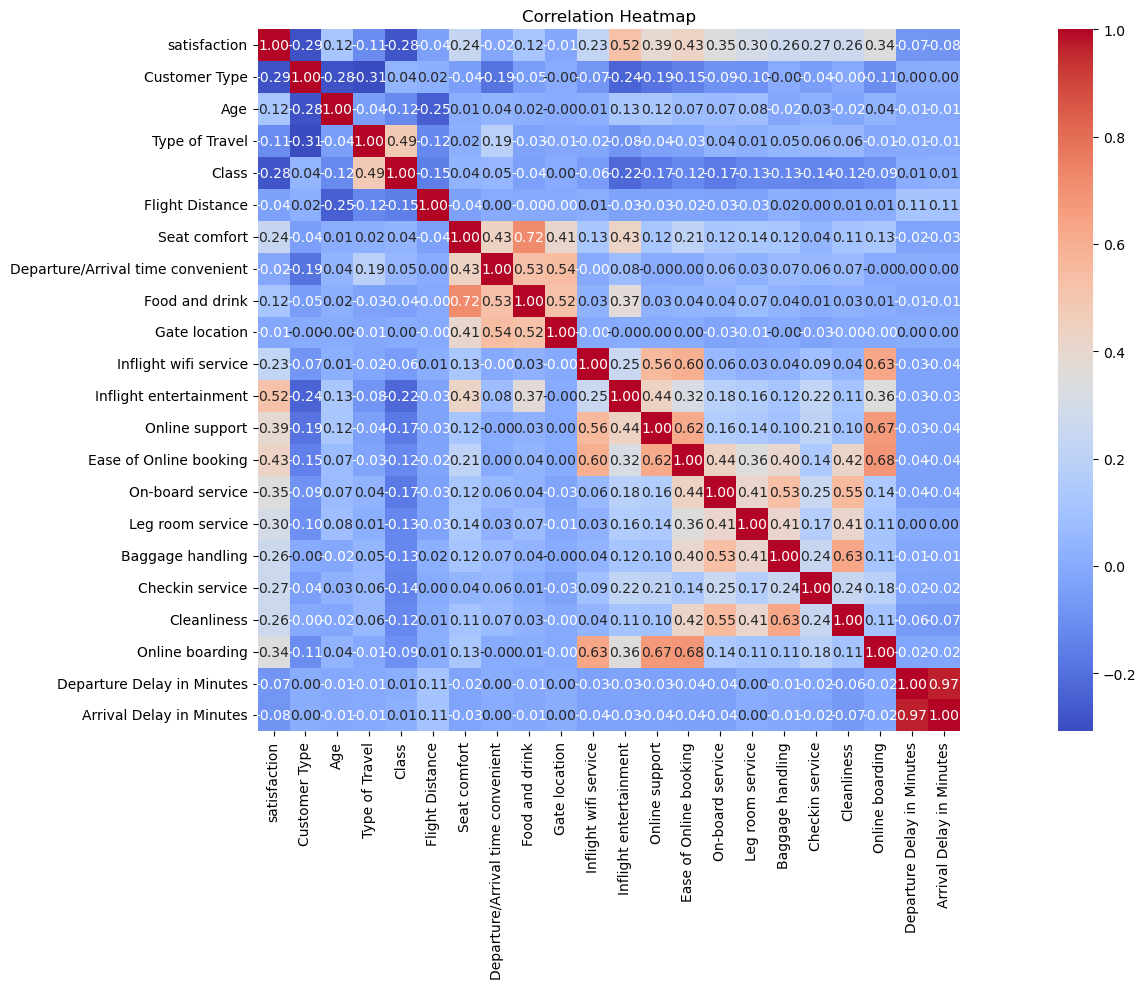

In [11]:

plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

<h3>Observation</h3>
Since the Departure Delay in minutes, flight distance, Gate location and arrival Delay in <br/>minutes 
show very low or <b>negative correlation</b> with satisfaction and <br/>Arrival Delay in Minutes also can introduce noise in the data,<br/> we will <b>drop</b> these columns 
 

<h3>Feature Engineering</h3>

<h3>Data Cleaning</h3>
<h4>Handling Missing Values And Imputing Columns</h4>

In [12]:
# Drop and clean data
df.drop(["Arrival Delay in Minutes", "Departure Delay in Minutes", "Flight Distance", 
             "Gate location"], axis=1, inplace=True)


In [13]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,65,1,1,0,0,0,2,4,2,3,3,0,3,5,3,2
1,1,0,47,1,0,0,0,0,0,2,2,3,4,4,4,2,3,2
2,1,0,15,1,1,0,0,0,2,0,2,2,3,3,4,4,4,2
3,1,0,60,1,1,0,0,0,3,4,3,1,1,0,1,4,1,3
4,1,0,70,1,1,0,0,0,4,3,4,2,2,0,2,4,2,5


In [14]:
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
dtype: int64

In [15]:
# Drop any remaining missing values
df.dropna(inplace=True)


In [16]:
correlation_of_airline_data = df.corr()
correlation_of_airline_data

,satisfaction,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
satisfaction,1.000000,-0.292592,0.117971,-0.109239,-0.278932,0.242384,-0.015507,0.120677,0.227062,0.523496,0.390143,0.431772,0.352047,0.304928,0.260347,0.266179,0.259330,0.338147
Customer Type,-0.292592,1.000000,-0.284172,-0.308236,0.042994,-0.042845,-0.186053,-0.048725,-0.073400,-0.235757,-0.186154,-0.149664,-0.085433,-0.097179,-0.000639,-0.044353,-0.002333,-0.106394
Age,0.117971,-0.284172,1.000000,-0.044808,-0.116921,0.008784,0.039055,0.015749,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973
Type of Travel,-0.109239,-0.308236,-0.044808,1.000000,0.486718,0.016839,0.191525,-0.031751,-0.019321,-0.079576,-0.039385,-0.025790,0.035899,0.013896,0.048421,0.057253,0.058405,-0.009368
Class,-0.278932,0.042994,-0.116921,0.486718,1.000000,0.035022,0.054518,-0.042236,-0.056670,-0.224242,-0.168457,-0.121663,-0.165430,-0.125318,-0.129086,-0.138172,-0.122513,-0.093906
Seat comfort,0.242384,-0.042845,0.008784,0.016839,0.035022,1.000000,0.434951,0.715997,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396
Departure/Arrival time convenient,-0.015507,-0.186053,0.039055,0.191525,0.054518,0.434951,1.000000,0.527381,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623
Food and drink,0.120677,-0.048725,0.015749,-0.031751,-0.042236,0.715997,0.527381,1.000000,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587
Inflight wifi service,0.227062,-0.073400,0.013965,-0.019321,-0.056670,0.129131,-0.001974,0.025917,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786
Inflight entertainment,0.523496,-0.235757,0.130511,-0.079576,-0.224242,0.426447,0.077203,0.367669,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714


<h4>🔍New Correlation Heatmap</h4>

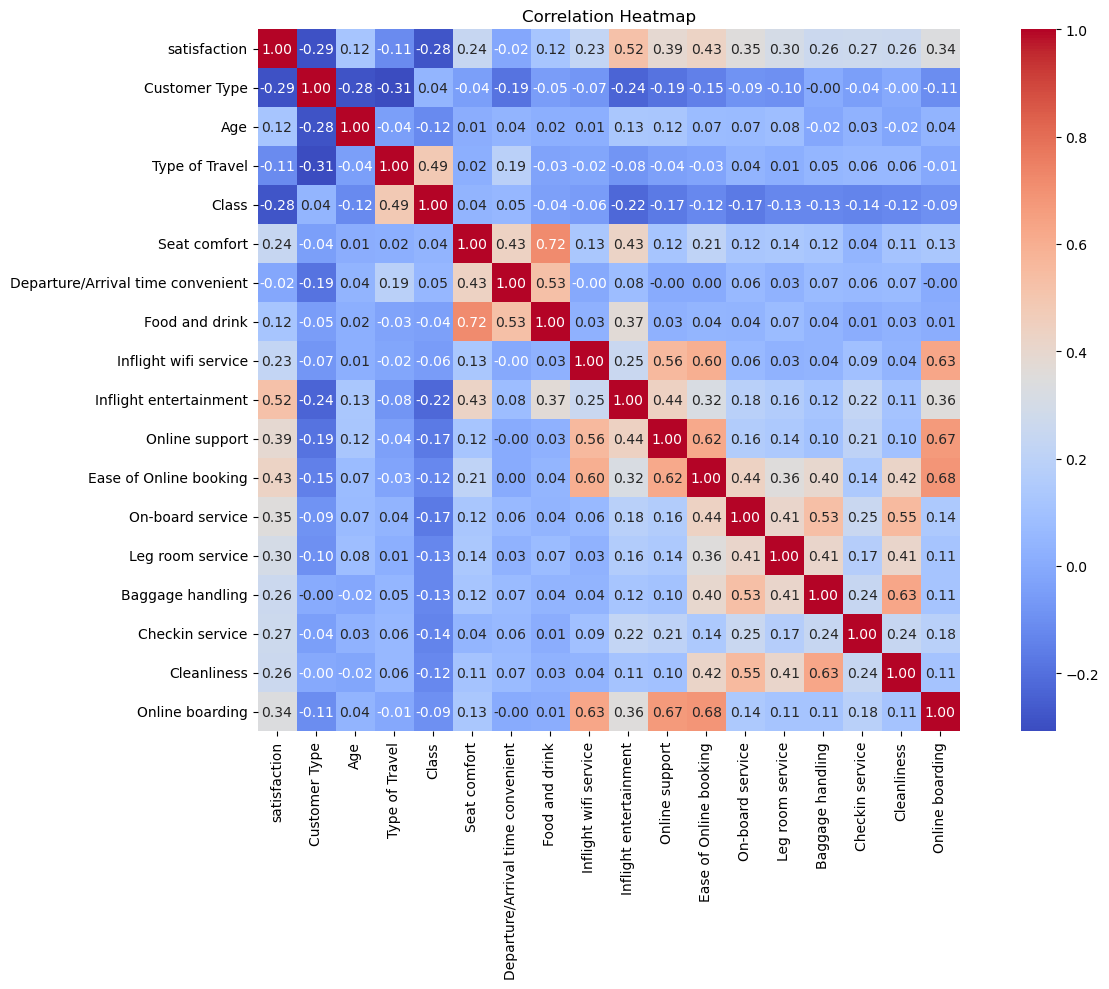

In [17]:

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

<h4>Observations</h4>
From above we can see that there were no missing values in any features but<br/>
there were features that showed negative correlation and had noise in them<br/>
These features were dropped and for extra consolation any missing values (if any)<br/>
were also removed.<br/>
A new heat map was generated, this is more favourable for training our model

<h3>Feature Selection</h3>
<h4>Imbalance Plot</h4>

C:\Users\User\AppData\Local\Temp\ipykernel_14168\3234974893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='Set2')


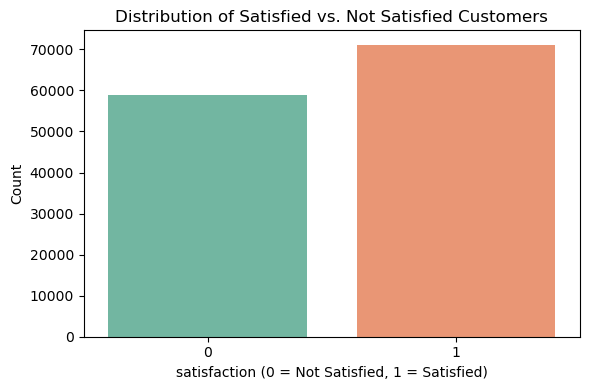

In [18]:
# imbalance plot helps analyse the balance between classes
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=df, palette='Set2')
plt.title('Distribution of Satisfied vs. Not Satisfied Customers')
plt.xlabel('satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3>Observations</h3>
Here wecheck for class imbalance for not satisfied=0 and satisfied customers, 
Class imbalance might<br/> affect model performance, especially for metrics like precision and recall.<br/>
here, satisfied customer are more than not satisfied it’s good for the airline, but still important<br/> to study what drives dissatisfaction in the minority.

<h3>Service Rating by Satisfaction</h3>

In [19]:

service_features = [
    'Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service'
]

<h3>Box plot</h3>

C:\Users\User\AppData\Local\Temp\ipykernel_14168\3804278316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='Set3')
C:\Users\User\AppData\Local\Temp\ipykernel_14168\3804278316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='Set3')
C:\Users\User\AppData\Local\Temp\ipykernel_14168\3804278316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='Set3')
C:\Users\User\AppData\Local\Temp\ipykernel_14168\3804278316.p

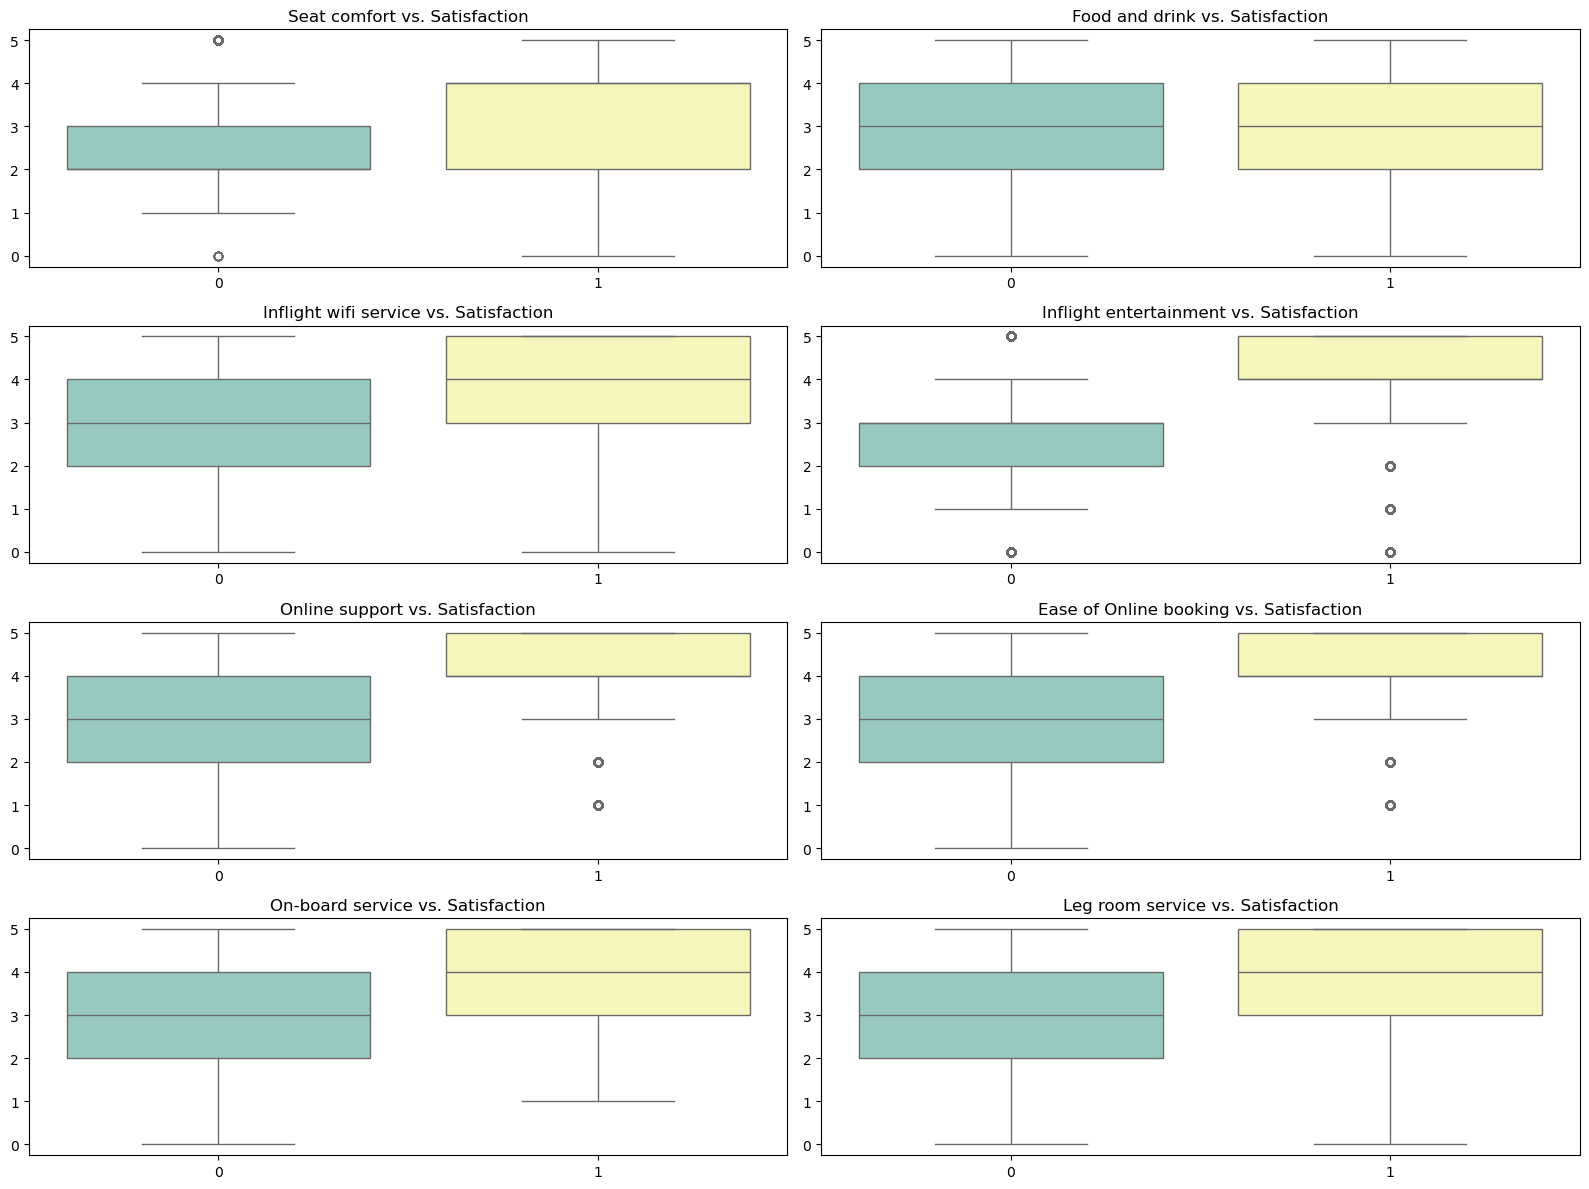

In [20]:
# Normalize column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

plt.figure(figsize=(16, 12))
for i, feature in enumerate(service_features):
    col = feature.lower().replace(' ', '_')
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x='satisfaction', y=col, palette='Set3')
    plt.title(f'{feature} vs. Satisfaction')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


<h4>Observations</h4>
This analysis suggests that comfort and entertainment-related services are the most impactful in determining customer satisfaction.
These features strongly influences how customers perceive the flight experience.
Passengers who are satisfied consistently rate these services higher, which suggests:
Comfort and engagement during the flight matter more than some pre-flight or booking-related features.
In contrast, features like Food & Drink or Ease of Booking show minimal difference — improving them likely has less impact on overall satisfaction.
Airlines aiming to improve satisfaction scores should prioritize enhancements in seat comfort, entertainment, and in-flight service quality.

<h3>🚀Model Training</h3>

In [21]:
# droping target column
# ---------------------
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [22]:
#dividing dataset into test train sets
#--------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#Random forest classifier for high accuracy
#------------------------------------------
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
#predicting outcomes
#--------------------
y_pred = rfc.predict(X_test)

<h3>Evaluation Metrics</h3>

In [25]:
#generating accuracy scores
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy Score: 0.9554203880505081

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



<h3>Observation</h3>
<p><b>Precision:</b>When the model predicts a class, it is correct 94-97% of the time</p>
<p>-Very low flase positives<p/><br/>
<p><b>Recall:</b>The model captures 95-96% of true class members</p>
<p>-Very low false negatives.<p/><br/>
<p><b>F1-score:</b>High balance between precision recall.</p>
<p>-The model is consistant and reliable.<p/><br/>
<p><b>Suppport:</b>Class distribution is fairly balanced, so no class bias is present in evaluation</p><br/>

<h3>Confusion Matrix</h3>

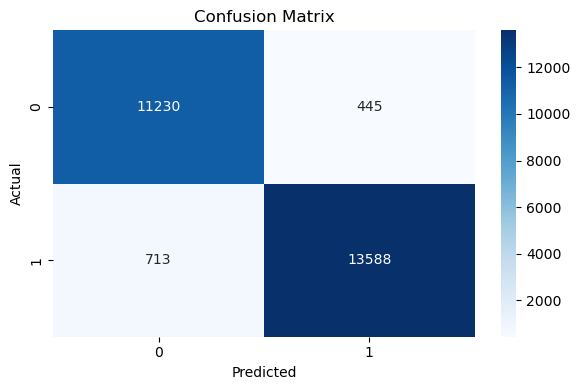

In [26]:
#confusion matrix helps us analyse the balance in performance
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

<h3>Observation</h3>
<p><b>Diagonal values</b><br/>Diagonal values (11,230 and 13,588) are musch higher than their counterparts, indicating a very accurate model.</p>
<p><b>False positives</b><br/>Low false positives (445 out of 11,675) indicate that the model rarely classifies the unsatisfied customers as satisfied</p>
<p><b>False negatives</b><br/>Relatively low false negatives (713 out of 14,301) indicates that the model rarely misses predicting actual satisfaction</p>
<p><b>Overall</b><br/>This matrix supports the previously mentioned accuracy of ~95.5%, showing strong and balanced performance</p>

<h3>🌲 Feature Importance</h3>

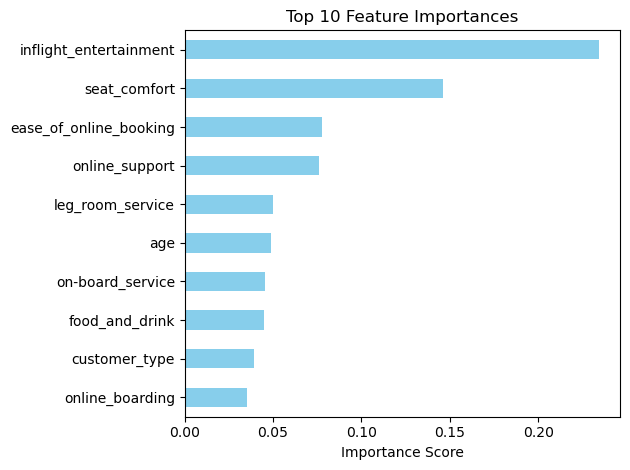

In [27]:
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<h3>Observation</h3>
<p>Inflight Entertainment stands out as the most influential feature, with the highest importance score (~0.23).
Seat Comfort is the second most important factor (~0.15).
Ease of Online Booking and Online Support also show significant influence (~0.08 each)
Leg Room Service, Age, On-board Service, and Food and Drink have moderate influence.
Customer Type (e.g., loyal vs. casual) and Online Boarding have relatively lower importance, but still contribute meaningfully in combination with others.</p>

<h3>K-Fold, Cross Validation</h3>

In [ ]:
#importing libraries
from sklearn.model_selection import KFold, cross_val_score
#  k-fold cross-validation to evaluate the peformance of the above model.
# as the data size is big, i will do 10 fold to get an accurate estimate of model performence.
k_fold = KFold(n_splits=10,shuffle=True, random_state= 42)
crossValidation = cross_val_score(rfc, X,y, cv=k_fold, scoring="accuracy")
crossValidation

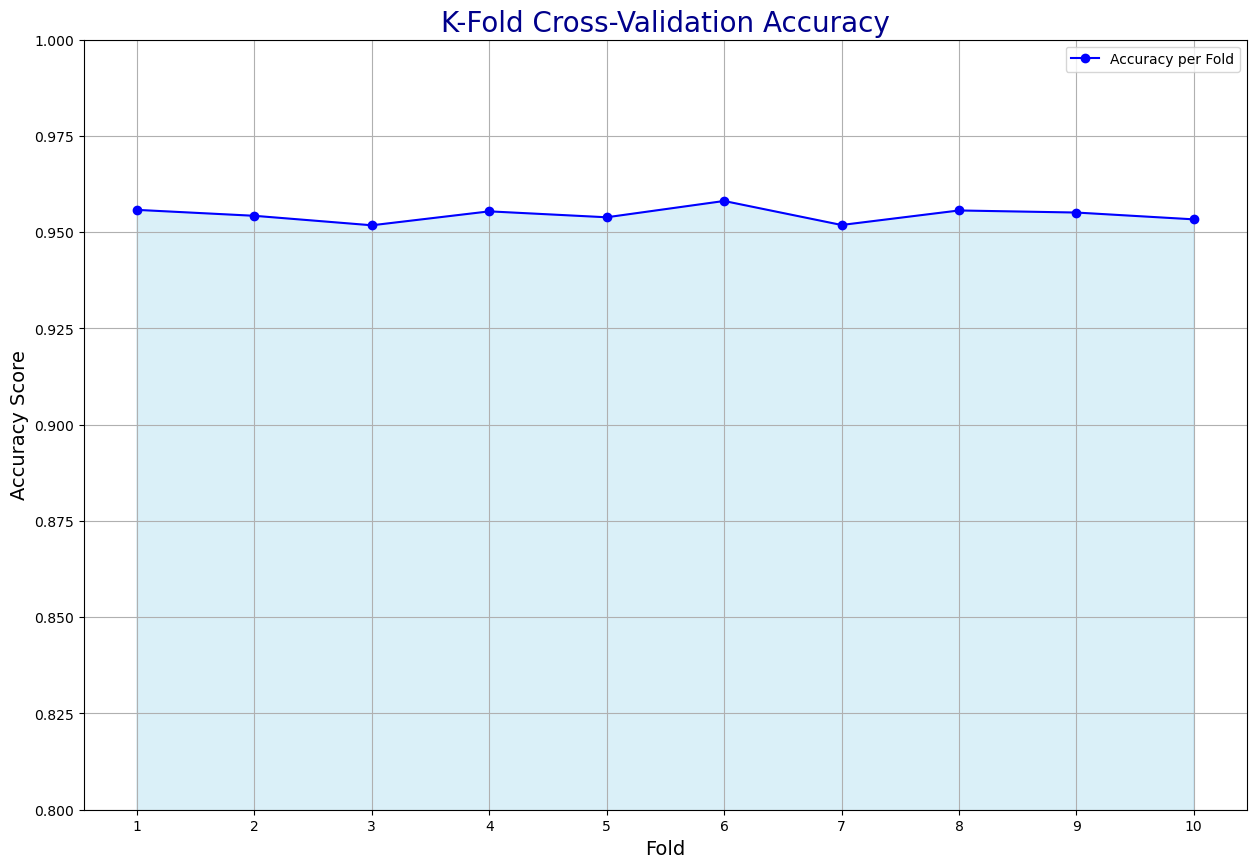

In [162]:
#importing libraries
import matplotlib.pyplot as plt
#designing plot
plt.figure(figsize=(15, 10))
plt.plot(range(1, k_fold.get_n_splits() + 1), crossValidation, marker="o", linestyle="-", color="blue", label="Accuracy per Fold")
plt.fill_between(range(1, k_fold.get_n_splits() + 1), crossValidation, color='skyblue', alpha=0.3)

plt.title("K-Fold Cross-Validation Accuracy", fontsize=20, color="darkblue")
plt.xlabel("Fold", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.ylim(0.8, 1)
plt.grid(True)
plt.xticks(range(1, k_fold.get_n_splits() + 1))
plt.legend()
plt.show()


<h3>Observation</h3>
<p>All folds have an accuracy of above 95%, which indicates that the model generalizes well to unseen data.<br/>
There is very little fluctuation in accuracy from fold to fold (ranging approximately between 95.1% and 95.7%).<br/>
The highest accuracy is observed around Fold 6, nearing 95.7%.<br/>
No fold shows a significant drop in accuracy, suggesting there are no major weaknesses in any subset of the data.<br/>
The light blue shaded area reinforces the consistent high accuracy range visually, making it easy to see the minimal variance</p>

<h2>📈 ROC Curve</h2>

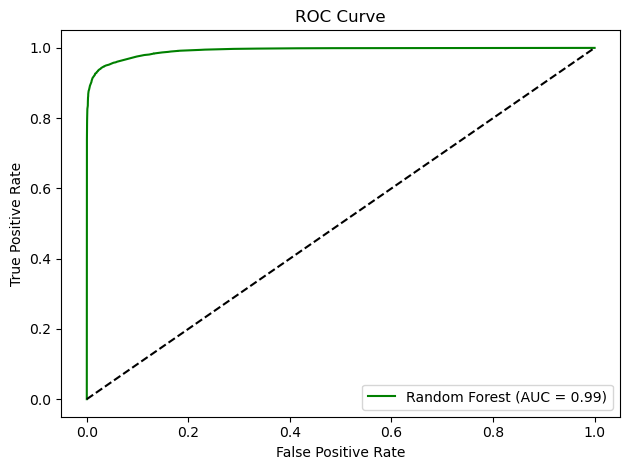

In [163]:

y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)), color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

<h3>Observation</h3>
<p>The ROC curve and the AUC score of 0.99 provide strong evidence that the Random Forest model is a robust and reliable classifier for predicting airline customer satisfaction. <br/>
It handles the trade-off between sensitivity and specificity exceptionally well, making it a strong candidate for real-world deployment in customer experience analytics.</p>